# Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, f1_score, confusion_matrix, roc_curve
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve
import plotly.graph_objects as go
     

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [2]:
from google.colab import files
data_to_load = files.upload()

import io
data = pd.read_csv(io.BytesIO(data_to_load['conversion_data_train.csv']))

Saving conversion_data_train.csv to conversion_data_train.csv


# Read file with labels

In [3]:
data = pd.read_csv('conversion_data_train.csv')
#data_test = pd.read_csv('conversion_data_test.csv')

In [4]:
#print("valeurs manquantes des datasets train et test: ")
#print(data.isnull().sum())


# Explore dataset

In [5]:
print('statistiques basiques')
print(data.describe())

statistiques basiques
                 age       new_user  total_pages_visited      converted
count  284580.000000  284580.000000        284580.000000  284580.000000
mean       30.564203       0.685452             4.873252       0.032258
std         8.266789       0.464336             3.341995       0.176685
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             7.000000       0.000000
max       123.000000       1.000000            29.000000       1.000000


In [6]:
print(data.groupby(['country']).size())
print('----')
print(data.groupby(['source']).size())

country
China       69122
Germany     11693
UK          43641
US         160124
dtype: int64
----
source
Ads        80027
Direct     65076
Seo       139477
dtype: int64


In [7]:
print("données aberrantes")
data[data['age'] >= 100]

données aberrantes


,country,age,new_user,source,total_pages_visited,converted
11331,UK,111,0,Ads,10,1
233196,Germany,123,0,Seo,15,1


In [8]:
# Suppression des données aberrantes 
data = data[data['age'] < 100]

In [9]:
print("Le dataset est trop volumineux piur l EDA : on réduit le dataser à 10000 lignes pour l'EDA.")
data_sample = data.sample(10000)

Le dataset est trop volumineux piur l EDA : on réduit le dataser à 10000 lignes pour l'EDA.


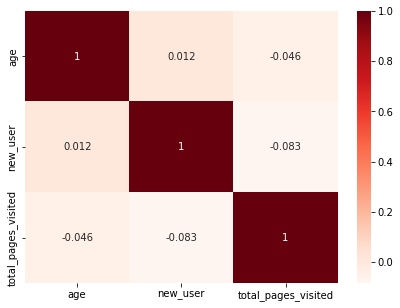

In [10]:
# correlation
cor = data
del cor['converted']

plt.figure(figsize=(7,5))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


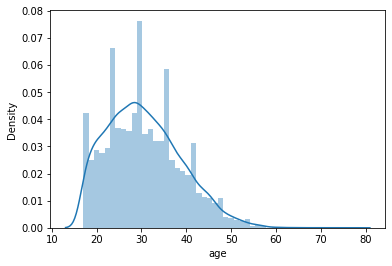

In [11]:
#Visualizing the 'age' distribution
sns.distplot(data_sample['age'])

la Chine compte un plus grand nombre de visiteurs sur le site.
Le taux de conversion est beaucoup plus faible que les autres pays



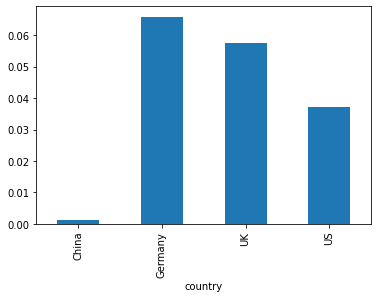

In [12]:
print("la Chine compte un plus grand nombre de visiteurs sur le site.")
print("Le taux de conversion est beaucoup plus faible que les autres pays")

print('')
data_sample.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

User s'abonnant selon le canal :


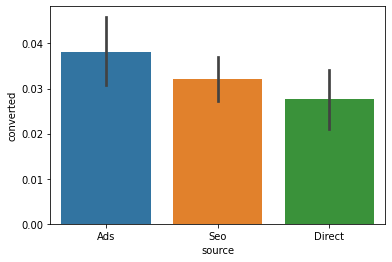

In [13]:
print("User s'abonnant selon le canal :")

sns.barplot(x='source',y='converted',data=data_sample)

plus de temps sur le site Web entraîne plus de conversions à la news letter :



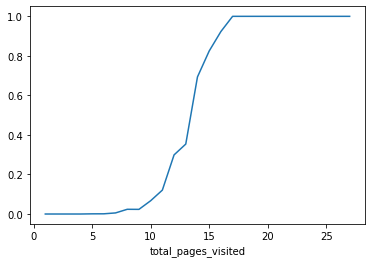

In [14]:
print("plus de temps sur le site Web entraîne plus de conversions à la news letter :")
print('')
data_sample.groupby(['total_pages_visited'])['converted'].mean().plot()

trop peu de pages visitées :


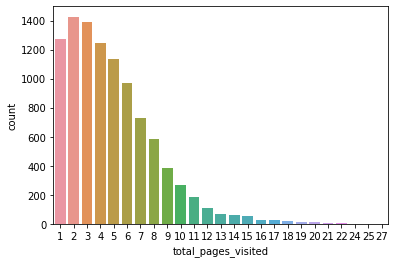

In [15]:
print("trop peu de pages visitées :")
sns.countplot(x='total_pages_visited', data=data_sample)

# modelisation

###  Modéle basé sur la variable : total_pages_visited (algorithme de classification)

In [16]:
data = pd.read_csv('conversion_data_train.csv')

In [17]:
target_variable = ['converted']
features_list = ['total_pages_visited']

In [18]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [19]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


Dividing into train and test sets...


In [20]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values


Convert pandas DataFrames to numpy arrays...


## Training pipeline

In [21]:
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)

# instancier le Train model 
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)


Encoding categorical features and standardizing numerical features...
Train model...


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predictions on training set...


## Test pipeline

In [22]:
print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)


Encoding categorical features and standardizing numerical features...


In [23]:
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)



Predictions on test set...


## Performance assessment

In [24]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))


Confusion matrix on train set : 
[[191982    855]
 [  2537   3832]]

Confusion matrix on test set : 
[[82219   344]
 [ 1114  1697]]


In [25]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82563
           1       0.83      0.60      0.70      2811

    accuracy                           0.98     85374
   macro avg       0.91      0.80      0.85     85374
weighted avg       0.98      0.98      0.98     85374



In [26]:
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6931982633863966
f1-score on test set :  0.6995053586150041


In [27]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_test_pred))
print("Precision:",metrics.precision_score(Y_test, Y_test_pred))
print("Recall:",metrics.recall_score(Y_test, Y_test_pred))

Accuracy: 0.9829222011385199
Precision: 0.8314551690347869
Recall: 0.6036997509782995


**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

###  Modèle basé sur toutes les variables 

In [28]:
data_all = pd.read_csv('conversion_data_train.csv')

In [29]:
data_final = pd.get_dummies(data)

In [30]:
# on sépare la target des autres variables

features_list = ['age','new_user','total_pages_visited','country_China','country_Germany','country_UK','country_US','source_Ads',
                 'source_Direct','source_Seo']
target_variable = 'converted'

X = data_final.loc[:, features_list]
Y = data_final.loc[:, target_variable]


In [31]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print()

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values


Dividing into train and test sets...

Convert pandas DataFrames to numpy arrays...


#### Training pipeline  with all variables : Preprocessings - Train model - Predictions on training set

In [32]:
# Preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("")


Encoding categorical features and standardizing numerical features...



In [33]:
print("Train model...")
classifier = LogisticRegression() 
classifier.fit(X_train, Y_train)
print("")


Train model...



In [34]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("")

Predictions on training set...



#### Test pipeline  with all variables : Preprocessings - Predictions on test set

In [35]:
print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)

print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("")

Encoding categorical features and standardizing numerical features...
Predictions on test set...



In [36]:
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()


Confusion matrix on train set : 
[[192086    751]
 [  1973   4396]]

Confusion matrix on test set : 
[[82267   296]
 [  897  1914]]



In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(classifier.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [38]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82563
           1       0.87      0.68      0.76      2811

    accuracy                           0.99     85374
   macro avg       0.93      0.84      0.88     85374
weighted avg       0.99      0.99      0.99     85374



In [39]:

print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7634595345606113
f1-score on test set :  0.7623979286994622


In [40]:
# Visualize ROC curves


**Our baseline model reaches a f1-score of almost 76% ... try other models DecisionTree & Random Forest 🚀🚀**

### Decision Tree and Random Forest


In [41]:
dataset  = data.copy()

### Preprocessing

#### Training pipeline

In [42]:
print("Separating labels from features...")
features_list = ["country", "age", "new_user","source","total_pages_visited"]
target_variable = "converted"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

Separating labels from features...


In [43]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'new_user', 'total_pages_visited']  at positions  [1, 2, 4]
Found categorical features  ['country', 'source']  at positions  [0, 3]


In [44]:
print("Dividing into train and test sets...")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)


Dividing into train and test sets...


In [45]:
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

Convert pandas DataFrames to numpy arrays...


#### Training pipeline

In [46]:
# Missing values
print("Imputing missing values...")

imputer = SimpleImputer(strategy="mean")
X_train[:,numeric_indices] = imputer.fit_transform(X_train[:,numeric_indices])

# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
print()

# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X_train = featureencoder.fit_transform(X_train)


# Label encoding
print("Encoding labels...")
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)


Imputing missing values...
Encoding categorical features and standardizing numerical features...

Encoding labels...


#### Test pipeline

In [47]:
# Missing values
print("Imputing missing values...")

X_test[:,numeric_indices] = imputer.transform(X_test[:,numeric_indices])

# Encoding categorical features and standardizing numerical features
print("Encoding categorical features and standardizing numerical features...")
X_test = featureencoder.transform(X_test)


# Label encoding
print("Encoding labels...")
Y_test = encoder.transform(Y_test)

Imputing missing values...
Encoding categorical features and standardizing numerical features...
Encoding labels...


##### DecisionTree

In [48]:
# DecisionTree

# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 4}
Best validation accuracy :  0.9855005622320613


In [49]:
#Performances

# Predictions on training set
Y_train_pred = gridsearch.predict(X_train)
print(Y_train_pred)

[0 0 0 ... 0 0 0]


In [50]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)

print(Y_test_pred)
print()

Predictions on test set...
[0 0 0 ... 0 0 0]



In [51]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9862824161922834
accuracy on test set :  0.9846440368262

f1-score on training set :  0.7635702929820577
f1-score on test set :  0.735632183908046



In [52]:
# Visualize ROC curves
probas_train = gridsearch.predict_proba(X_train)[:,1]
precisions, recalls, thresholds = roc_curve(Y_train, probas_train)
fig = go.Figure(
    data = go.Scatter(
        name = 'train',
        x = recalls, 
        y = precisions, 
        mode = 'lines'
    ),
    layout = go.Layout(
        title = go.layout.Title(text = "ROC curve", x = 0.5),
        xaxis = go.layout.XAxis(title = 'False Positive Rate'),
        yaxis = go.layout.YAxis(title = 'True Positive Rate')
    )
)

probas_test = gridsearch.predict_proba(X_test)[:,1]
precisions, recalls, thresholds = roc_curve(Y_test, probas_test)
fig.add_trace(go.Scatter(
    name = 'test',
    x = recalls, 
    y = precisions, 
    mode = 'lines'
    )
)
fig.show()

##### Random Forest 

In [58]:
param = {"n_estimators": np.arange(40,50),
        "max_depth": np.arange(2,6),
        "min_samples_split": np.arange(2,5)}

In [59]:
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=param)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [60]:
grid.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 44}

In [61]:
grid.best_estimator_.score(X_train, Y_train)

0.9849207604188629

In [62]:
grid.best_estimator_.score(X_test, Y_test)

0.9843980602993886

In [63]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
print()

accuracy on training set :  0.9862824161922834
accuracy on test set :  0.9846440368262

f1-score on training set :  0.7635702929820577
f1-score on test set :  0.735632183908046

